<a href="https://colab.research.google.com/github/swathi0710/Hamoeye_TagAlongCodes/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data=pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")

In [20]:
data.columns

Index(['FullDate', 'Tmax', 'SysLoad', 'GasPrice', 'ElecPrice'], dtype='object')

In [26]:
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice,Date,Time
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710,2010-09-01,00:00:00
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635,2010-09-01,01:00:00
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565,2010-09-01,02:00:00
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910,2010-09-01,03:00:00
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030,2010-09-01,04:00:00


Preprocessing: <br>
1.Split full date into date and time <br>
2.Convert Date to datetime stamp <br>
3.Use new date column as index<br>

In [22]:
from datetime import datetime

In [29]:
data["Date"]=[a[:10]for a in data["FullDate"]]
data["Time"]=[a[11:]for a in data["FullDate"]]
data=data.drop(["FullDate"],axis=1)

In [31]:
data['Date'] = pd.to_datetime(data.Date)
data['Time'] = pd.to_datetime(data.Time)
data.set_index('Date', inplace = True)

Upsampling to daily rate using sum

In [32]:
df_daily = data.resample('D').sum()

In [33]:
df_daily.head()

,Tmax,SysLoad,GasPrice,ElecPrice
Date,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


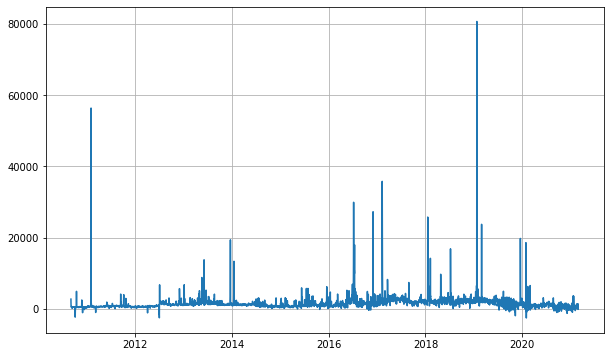

In [57]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.ElecPrice )
plt.grid()


In [58]:
from statsmodels.tsa.stattools import adfuller

In [63]:
result = adfuller(df_daily.ElecPrice, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -8.269053866873803
n_lags: 4.848817773711633e-13
p-value: 4.848817773711633e-13
Critial Values:
   1%, -3.432066157296446
Critial Values:
   5%, -2.8622983040036005
Critial Values:
   10%, -2.5671736550459663


Spliting data into test and train sets

In [54]:
df_train=df_daily[:2757]
df_test=df_daily[2757:]

In [39]:
print(len(df_train),len(df_test))

2757 1077


Training FBProphet model

In [44]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536393 sha256=fdc6e8fccdea12f52595d0f274b2cafe2535e502bbcd46266a07b4a6e9ba8880
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet


In [45]:
from fbprophet import Prophet

In [55]:
df_train["Date"]=df_train.index
data_new=df_train.rename(columns={"Date":"ds", "ElecPrice":"y"})
data_new.head()


<ipython-input-55-11377e388659>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Date"]=df_train.index


,Tmax,SysLoad,GasPrice,y,ds
Date,,,,,
2010-09-01,379.2,41565.380,88.56,2751.700,2010-09-01
2010-09-02,369.6,38898.990,88.56,570.810,2010-09-02
2010-09-03,439.2,41665.760,106.80,504.975,2010-09-03
2010-09-04,328.8,35638.085,81.36,502.275,2010-09-04
2010-09-05,357.6,35611.410,106.80,500.555,2010-09-05


In [56]:
model = Prophet()
model.fit(data_new)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [70]:
ds=pd.DataFrame(df_test.index)
ds=ds.rename(columns={"Date":"ds"})
ds

,ds
0,2018-03-20
1,2018-03-21
2,2018-03-22
3,2018-03-23
4,2018-03-24
...,...
1072,2021-02-24
1073,2021-02-25
1074,2021-02-26
1075,2021-02-27


In [77]:
forecast=model.predict(ds)
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2685.995282,9.744271,4856.275170,2685.995282,2685.995282,-154.967811,-154.967811,-154.967811,9.737563,9.737563,9.737563,-164.705374,-164.705374,-164.705374,0.0,0.0,0.0,2531.027472
1,2018-03-21,2686.787698,314.502859,5054.159419,2686.787698,2686.787698,-2.473227,-2.473227,-2.473227,159.362662,159.362662,159.362662,-161.835889,-161.835889,-161.835889,0.0,0.0,0.0,2684.314472
2,2018-03-22,2687.580114,447.090080,5273.222514,2687.580114,2687.580114,95.717382,95.717382,95.717382,257.120465,257.120465,257.120465,-161.403083,-161.403083,-161.403083,0.0,0.0,0.0,2783.297497
3,2018-03-23,2688.372531,134.343590,4989.484004,2688.372531,2688.372531,-112.965306,-112.965306,-112.965306,50.276079,50.276079,50.276079,-163.241385,-163.241385,-163.241385,0.0,0.0,0.0,2575.407225
4,2018-03-24,2689.164947,-306.970880,4619.835694,2689.164947,2689.164947,-438.563887,-438.563887,-438.563887,-271.455104,-271.455104,-271.455104,-167.108783,-167.108783,-167.108783,0.0,0.0,0.0,2250.601060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,3535.465368,576.680926,6557.488903,1887.636682,5359.162911,-89.597565,-89.597565,-89.597565,159.362662,159.362662,159.362662,-248.960227,-248.960227,-248.960227,0.0,0.0,0.0,3445.867803
1073,2021-02-25,3536.257784,881.671739,6392.193857,1886.183966,5362.822933,-23.525189,-23.525189,-23.525189,257.120465,257.120465,257.120465,-280.645654,-280.645654,-280.645654,0.0,0.0,0.0,3512.732595
1074,2021-02-26,3537.050200,271.185449,6133.657773,1884.731250,5366.482954,-257.512152,-257.512152,-257.512152,50.276079,50.276079,50.276079,-307.788231,-307.788231,-307.788231,0.0,0.0,0.0,3279.538049
1075,2021-02-27,3537.842616,-197.119843,5875.005416,1883.278534,5368.633536,-601.648810,-601.648810,-601.648810,-271.455104,-271.455104,-271.455104,-330.193706,-330.193706,-330.193706,0.0,0.0,0.0,2936.193807


Calculating APE:

In [89]:
p=list(forecast["yhat"])
p

[2531.027471621889,
 2684.3144717724854,
 2783.297496503218,
 2575.4072250029,
 2250.6010599507067,
 2174.521064160973,
 2648.8134560881476,
 2513.762911677028,
 2655.79905464868,
 2745.926286798065,
 2531.8692715269144,
 2203.7892595579397,
 2127.4362484563403,
 2604.4655281311116,
 2475.0719644852115,
 2625.499423136889,
 2726.4764184400674,
 2525.370149534178,
 2211.9138793528236,
 2151.372339633167,
 2644.87333827506,
 2532.0584884328346,
 2698.6099836100248,
 2814.7039950187705,
 2627.182327162331,
 2325.2967602723447,
 2273.890249170148,
 2773.742670477691,
 2664.2335965790116,
 2830.8786365477017,
 2943.7896048591,
 2749.8499171428643,
 2438.459491292853,
 2374.7132650434555,
 2859.741057988761,
 2733.361387113924,
 2881.6059985674656,
 2975.165685511639,
 2761.54917880274,
 2430.8098445523738,
 2348.704811164451,
 2817.0148069994284,
 2676.177897045007,
 2812.794470361191,
 2898.0546300281662,
 2679.8803302317515,
 2348.6375120333996,
 2270.2833221784754,
 2746.67708814223,
 26

In [90]:

actual=list(df_test["ElecPrice"])
actual

[1833.0,
 1730.4899999999998,
 2260.55,
 2138.76,
 1721.7,
 870.875,
 1943.57,
 1557.425,
 1906.675,
 2193.82,
 2081.77,
 2473.54,
 2127.87,
 1760.545,
 2078.63,
 2299.465,
 2318.605,
 2180.145,
 2170.25,
 1474.85,
 2387.96,
 2706.7850000000003,
 2007.2,
 2177.1,
 1762.395,
 807.855,
 395.915,
 1854.07,
 2219.485,
 2135.6349999999998,
 2378.52,
 2430.04,
 1900.88,
 1904.045,
 1867.965,
 3527.3900000000003,
 2151.5550000000003,
 9723.195,
 4534.46,
 1876.12,
 1622.77,
 2105.07,
 2003.635,
 1591.385,
 1355.265,
 1324.27,
 1664.345,
 1688.88,
 1212.5249999999999,
 2855.55,
 3343.21,
 1421.995,
 1475.68,
 1610.33,
 1796.575,
 3114.62,
 2611.22,
 3049.0750000000003,
 2804.875,
 2598.71,
 2536.35,
 2237.995,
 2115.9049999999997,
 2547.065,
 3374.635,
 2643.105,
 2233.5,
 1687.615,
 1276.83,
 1395.42,
 1771.045,
 2075.03,
 2443.395,
 2587.5950000000003,
 2742.16,
 2427.705,
 3192.975,
 2734.84,
 2335.325,
 1897.1850000000002,
 2358.25,
 2949.64,
 1901.535,
 1285.37,
 1959.625,
 1973.64,
 1727

In [91]:
APE=[]
for i in range(len(p)):

    err=abs(actual[i] - p[i]) / actual[i]
    APE.append(err)
  
MAPE = sum(APE)*100/len(APE)
MAPE

544.7579467573114